In [1]:
import networkx as nx

In [2]:
import tqdm
import pandas as pd
import numpy as np

## Subgraph coming from categories

In [58]:
playlists_graph = nx.read_gpickle('../data/playlists_projection.gpkl')

In [53]:
small_playlists_graph = playlists_graph.subgraph(pd.read_pickle('../data/filtered_small.pkl').index)

In [61]:
small_playlists_graph = small_playlists_graph.copy()

In [62]:
weight = nx.get_edge_attributes(small_playlists_graph, 'weight')
len([small_playlists_graph.remove_edge(k[0],k[1]) for k,v in weight.items() if v<3])

2719

In [64]:
small_playlists_graph = small_playlists_graph.subgraph(list(nx.connected_components(small_playlists_graph))[0])

In [66]:
nx.write_gpickle(small_playlists_graph, '../data/playlists_small_projection.gpkl')

In [67]:
small_playlists_graph = nx.read_gpickle('../data/playlists_small_projection.gpkl')

In [68]:
len(small_playlists_graph.nodes()), len(small_playlists_graph.edges())

(318, 2499)

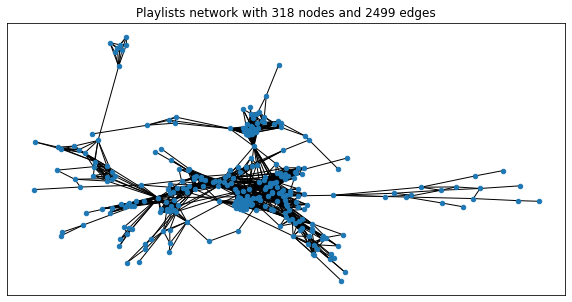

In [168]:
plt.figure(figsize=(10,5))
nx.draw_networkx(small_playlists_graph, with_labels=False, node_size=20)
plt.title("Playlists network with {:d} nodes and {:d} edges".format(len(small_playlists_graph.nodes), 
                                                                                    len(small_playlists_graph.edges)))
plt.show()

# Random graphs

Let's see the graph properties we are trying to replicate

In [169]:
G = small_playlists_graph

In [170]:
import itertools
import random
import matplotlib.pyplot as plt

%matplotlib inline
import networkx as nx

In [ ]:
diamG = nx.diameter(G)
radG = nx.radius(G)
%time print("The radius of this network is {:d} and the diameter is {:d}".format(radG, diamG))

In [ ]:
def get_degree_dist(G):
    degrees = list(dict(G.degree()).values())
    plt.figure(figsize=(20,4))
    plt.hist(degrees, bins=25)
    plt.title('Degree distribution')
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()
get_degree_dist(G)

In [ ]:
# Position to draw all the plots with the same network structure
pos = nx.spring_layout(G)

fig = plt.figure(figsize=(20,5))
print("Computing clustering... ",end="")
ax = fig.add_subplot(1,3,1)
ax.set_title("Clustering")

node_colors = np.array(list(nx.clustering(G).values()))
node_colors = (node_colors-min(node_colors))/(max(node_colors)-min(node_colors))
nx.draw(G, pos, node_color=node_colors, node_size=20, cmap=plt.cm.Reds)

print("DONE")

### By number of nodes and edges

In [82]:
random_1 = nx.barabasi_albert_graph(len(G), int(np.mean(degrees)))

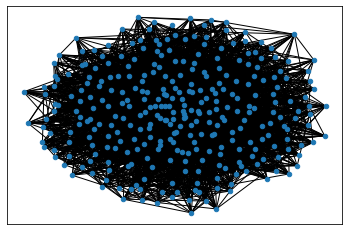

In [83]:
nx.draw_networkx(random_1, with_labels=False, node_size=20)

S'assembla en quant a nodes i edges

In [84]:
len(random_1.nodes()), len(random_1.edges())

(318, 4545)

Les distribucions no tenen res a veure

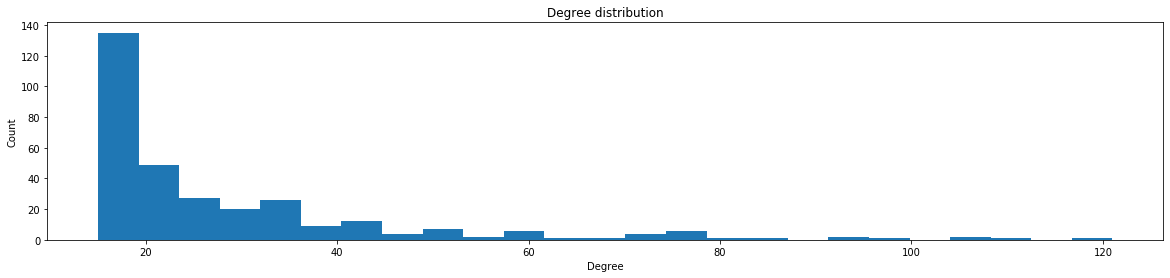

In [86]:
get_degree_dist(random_1)

In [97]:
random_3 = nx.connected_watts_strogatz_graph(len(G), int(np.mean(degrees)/2),0.2)

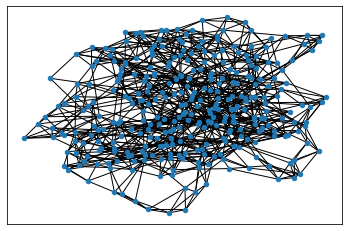

In [98]:
nx.draw_networkx(random_3, with_labels=False, node_size=20)

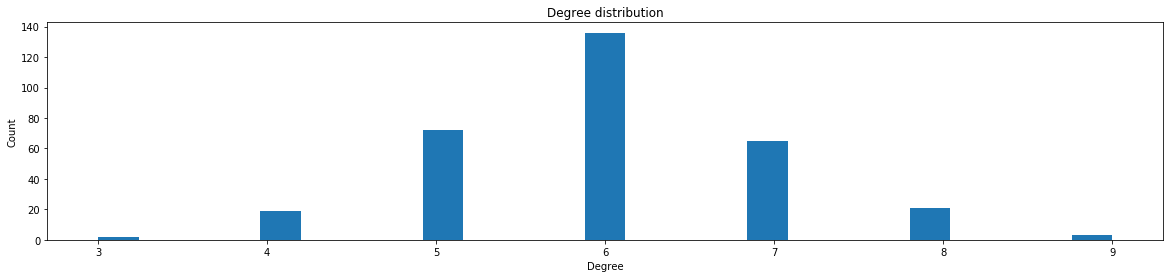

In [102]:
get_degree_dist(random_3)

### By degree distribution

In [109]:
degree_seq_g = list(dict(G.degree()).values())

In [110]:
random_4 = nx.configuration_model(degree_seq_g)

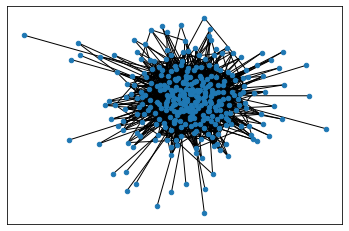

In [111]:
nx.draw_networkx(random_4, with_labels=False, node_size=20)

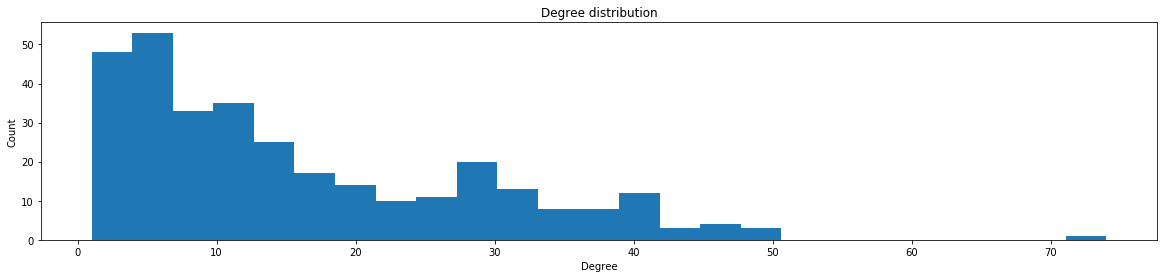

In [112]:
get_degree_dist(random_4)

In [113]:
random_5 = nx.havel_hakimi_graph(degree_seq_g)

Beautiful but not what we are looking for

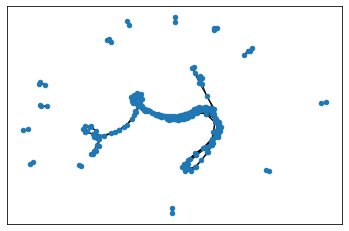

In [114]:
nx.draw_networkx(random_5, with_labels=False, node_size=20)

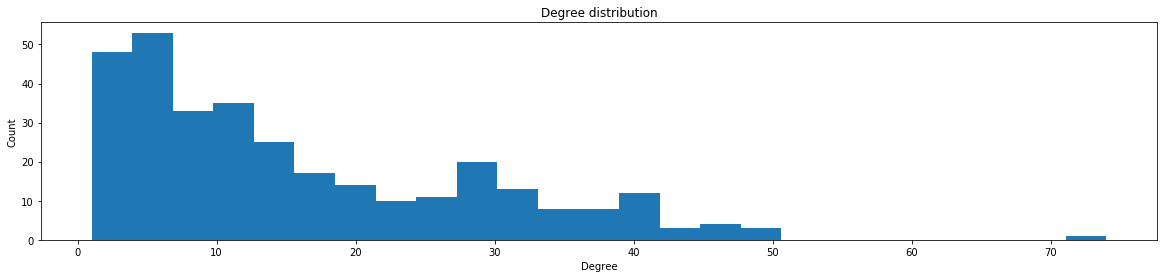

In [115]:
get_degree_dist(random_5)

In [118]:
random_6 = nx.expected_degree_graph(degree_seq_g)

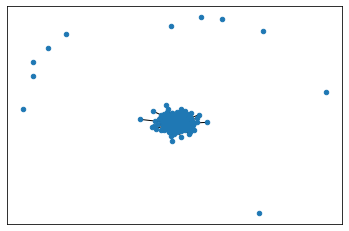

In [120]:
nx.draw_networkx(random_6, with_labels=False, node_size=20)

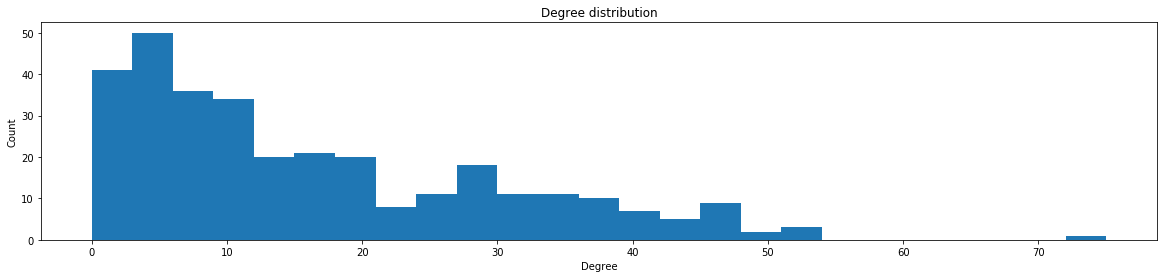

In [119]:
get_degree_dist(random_6)

### Social networks

It could be that we see a social network behaviour in our graph, as playlists "represent" different groups of people

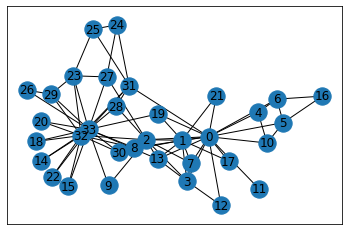

In [126]:
# example
nx.draw_networkx(nx.karate_club_graph())

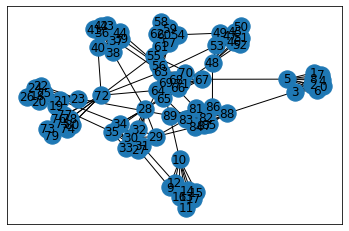

In [144]:
nx.draw_networkx(nx.relaxed_caveman_graph(10,9,0.1))

In [139]:
np.mean([len(c) for c in list(nx.find_cliques(G))])

9.098920863309353

In [140]:
len([len(c) for c in list(nx.find_cliques(G))])

556

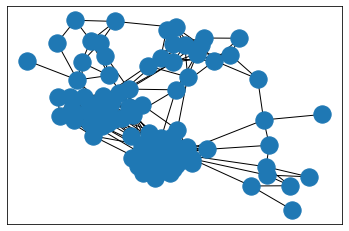

In [166]:
random_n = nx.random_partition_graph([15,50,10,10,25],0.3,0.01)
nx.draw_networkx(random_n, with_labels=False)

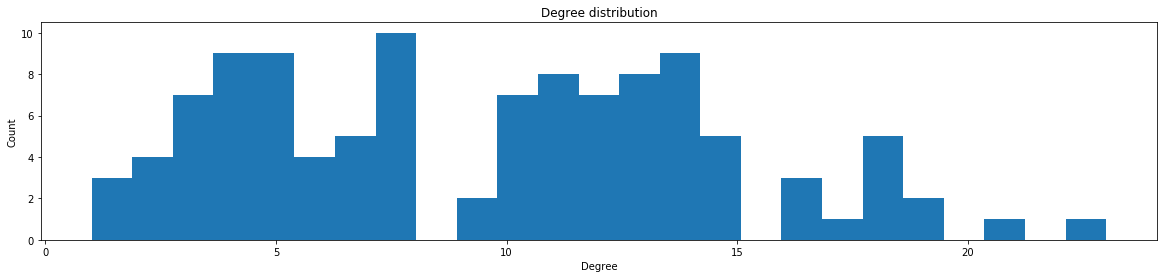

In [167]:
get_degree_dist(random_n)